### Data Preparation

**Import Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(42)
sns.set_theme(style="whitegrid")
import matplotlib.dates as mdates

# !pip install keras-tuner
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
import random
import time

**Read the files**

In [5]:
set1 = pd.read_csv('../Data/SET_main.csv')

# This file is consist of data that have Nan values
macro = pd.read_csv('../Data/macro_data.csv')
sp500 = pd.read_csv('../Data/sp500_main.csv')

# stock name
set_name = sp500

*Preparing the data as inputs*

In [7]:
macro= macro.set_index('Date')
macro

,Interest_Rate,GDP,Unemployment,Inflation_x
Date,,,,
2012-10-01,NaN,16420.419,NaN,NaN
2012-12-01,0.16,16420.419,7.9,231.221
2013-01-01,0.14,16648.189,8.0,231.679
2013-02-01,0.15,16648.189,7.7,232.937
2013-03-01,0.14,16648.189,7.5,232.282
...,...,...,...,...
2024-07-01,5.33,29354.321,4.3,313.534
2024-08-01,5.33,29354.321,4.2,314.121
2024-09-01,5.13,29354.321,4.1,314.686


In [8]:
sp500 = sp500.set_index('Date')
sp500

,AAPL,AMZN,AVGO,COST,GOOG,GOOGL,HD,JPM,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2014-01-02,17.234297,19.898500,3.961283,94.369179,27.624825,27.755241,63.568802,43.285351,40.585152,77.984024,54.545769,31.058565,0.373966,32.008656,58.940643,10.006667,63.013271,51.132057,21.054295,62.739441
2014-01-03,16.855730,19.822001,3.976331,93.952660,27.423307,27.552771,63.468048,43.619984,40.881153,77.672729,54.396221,30.849604,0.369486,31.923794,58.874783,9.970667,63.461128,51.166771,20.984922,62.588505
2014-01-06,16.947645,19.681499,3.949246,93.239731,27.729059,27.859968,62.855755,43.872814,41.225163,77.287491,57.028294,30.197683,0.374438,31.796507,59.013802,9.800000,62.734417,50.859058,20.867523,62.682835
2014-01-07,16.826441,19.901501,3.986865,92.807159,28.263626,28.397058,63.165791,43.367157,40.953148,78.364082,57.746128,30.431717,0.380568,32.118965,59.584633,9.957333,64.652641,51.247742,20.931564,63.569683
2014-01-08,16.933004,20.096001,4.046303,91.357330,28.322445,28.456152,63.499035,43.776134,40.889141,78.340698,58.055202,29.888441,0.385756,32.008652,58.721100,10.085333,63.900585,51.411995,20.766140,63.362122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05,243.039993,220.550003,170.470001,982.260010,174.112473,172.442368,426.540009,245.479996,825.619995,524.770020,608.929993,442.619995,145.059998,186.240005,176.029999,369.489990,576.757812,309.079987,95.300003,114.779999
2024-12-06,242.839996,227.029999,179.529999,992.609985,176.290009,174.510010,431.369995,247.360001,826.710022,528.570007,623.770020,443.570007,142.440002,191.690002,173.820007,389.220001,547.519958,311.010010,95.699997,113.570000
2024-12-09,246.750000,226.089996,178.940002,987.859985,177.100006,175.369995,429.179993,243.809998,803.580017,522.820007,613.570007,446.019989,138.809998,190.449997,170.789993,389.790009,560.619995,308.299988,93.830002,112.900002


In [9]:
# Loop through each unique ticker (stock) in the DataFrame
indicator = pd.DataFrame()
for ticker in sp500.columns:
    # Calculate SMAs 
    indicator[f'{ticker}_SMA3'] = sp500[ticker].rolling(window=3).mean()
    indicator[f'{ticker}_SMA20'] = sp500[ticker].rolling(window=20).mean()
    indicator[f'{ticker}_SMA50'] = sp500[ticker].rolling(window=50).mean()
    indicator[f'{ticker}_SMA100'] = sp500[ticker].rolling(window=100).mean()
    indicator[f'{ticker}_SMA200'] = sp500[ticker].rolling(window=200).mean()
    
    # Calculate EMA
    indicator[f'{ticker}_EMA3'] = sp500[ticker].ewm(span=3, adjust=False).mean()
    indicator[f'{ticker}_EMA12'] = sp500[ticker].ewm(span=12, adjust=False).mean()
    indicator[f'{ticker}_EMA26'] = sp500[ticker].ewm(span=26, adjust=False).mean()
    
    # Calculate MACD
    indicator[f'{ticker}_MACD'] = indicator[f'{ticker}_EMA12'] - indicator[f'{ticker}_EMA26']
    
    # Calculate Signal line (9-day EMA of the MACD)
    indicator[f'{ticker}_signal'] = indicator[f'{ticker}_MACD'].ewm(span=9, adjust=False).mean()
    
    # Concatenate each ticker's results into the final indicator DataFrame
    indicator = pd.concat([indicator, sp500], axis=1)

In [10]:
indicator = indicator.dropna()

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Merge all the files that have X-variable (features)
features_df = pd.merge(macro, indicator, on='Date', how='outer')
features_df = features_df.fillna(method='ffill').dropna()

In [12]:
# drop the same column names
features_df = features_df.loc[:, ~features_df.columns.duplicated()]

In [13]:
# Make the rows number the same with target and features files
# set the index to the format Datetime
sp500.index = pd.to_datetime(sp500.index)
features_df.index = pd.to_datetime(features_df.index)

# Align the two DataFrames by finding the intersection of their indices
common_index = sp500.index.intersection(features_df.index)

# Reindex both DataFrames to the common index
sp500 = sp500.loc[common_index]
features_df = features_df.loc[common_index]

# Merge the table 
df = pd.concat([sp500, features_df], axis=1)

In [14]:
feature_columns_list = [col for col in df.columns if col not in sp500.columns]

### Modeling 

**Data Preparation**

In [17]:
def data_prep(df, stock_columns, feature_columns, test_size, window_size):
    results = {}

    # Ensure feature_columns is a clean list of feature names
    if not isinstance(feature_columns, list):
        raise ValueError("`feature_columns` should be a list of feature names.")
    
    for stock in stock_columns:
        print(f"Processing stock: {stock}")
        
        # Ensure the index is in datetime format
        df.index = pd.to_datetime(df.index)

        # Plot training and test sets for the target variable
        plt.figure(figsize=(12, 3))
        plt.plot(df.index[:-test_size], df[stock][:-test_size], color='black', label="Training set")
        plt.plot(df.index[-test_size:], df[stock][-test_size:], color='blue', label="Test set")
        plt.title(f"{stock} Training and Test Sets", fontsize=15)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Price", fontsize=12)
        
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.xlim(df.index.min(), df.index.max())
        plt.grid(color="lightgray")
        plt.gca().set_facecolor("white")
        plt.legend(loc="upper left")
        plt.tight_layout()
        plt.show()

        # Combine feature columns with the target stock column
        selected_columns = feature_columns + [stock]
        
        # Ensure selected_columns exist in the dataframe
        missing_cols = [col for col in selected_columns if col not in df.columns]
        if missing_cols:
            raise KeyError(f"Missing columns in dataframe: {missing_cols}")
        
        data = df[selected_columns].copy()
        
        # Scale the data
        scaler = MinMaxScaler()
        data_scaled = scaler.fit_transform(data)
        
        # Split into training and testing sets
        train_data = data_scaled[:-test_size]
        test_data = data_scaled[-test_size-window_size:]
        
        # Separate features (X) and target (y) for training
        X_train, y_train = [], []
        for i in range(window_size, len(train_data)):
            X_train.append(train_data[i-window_size:i, :-1])  # All features except the target
            y_train.append(train_data[i, -1])               # Only the target stock column
        
        # Separate features (X) and target (y) for testing
        X_test, y_test = [], []
        for i in range(window_size, len(test_data)):
            X_test.append(test_data[i-window_size:i, :-1])  # All features except the target
            y_test.append(test_data[i, -1])               # Only the target stock column
        
        # Convert to numpy arrays for model compatibility
        X_train = np.array(X_train)
        X_test = np.array(X_test)
        y_train = np.array(y_train).reshape(-1, 1)
        y_test = np.array(y_test).reshape(-1, 1)

        print(f'{stock} - X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}')
        print(f'{stock} - X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}')
        
        # Store results for the current stock
        results[stock] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'scaler': scaler  # Save the scaler for potential inverse transformation
        }
    
    return results


*Applying the function for sp500 (Stock exchange of Thailand)*

In [19]:
stock_column = list(sp500.columns)
test_size = 360 
window_size = 60

In [20]:
# Make sure feature_columns is a list of strings, not DataFrame columns
print(f"Type of feature_columns: {type(feature_columns_list)}")
print(f"First element in feature_columns: {feature_columns_list[0]}")

Type of feature_columns: <class 'list'>
First element in feature_columns: Interest_Rate


Processing stock: AAPL


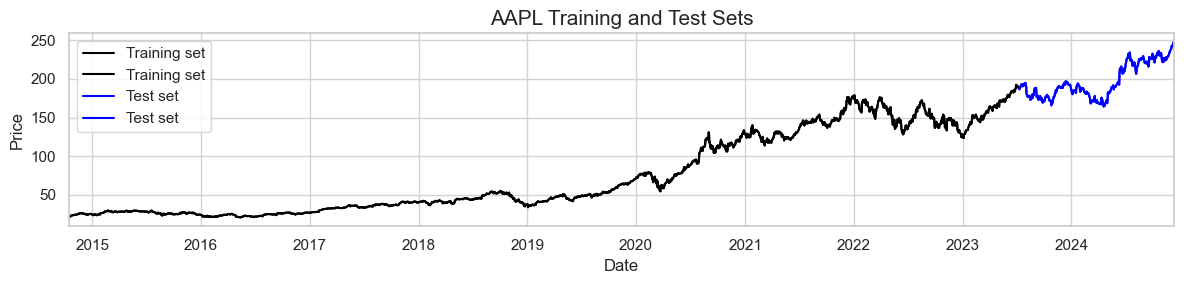

AAPL - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
AAPL - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: AMZN


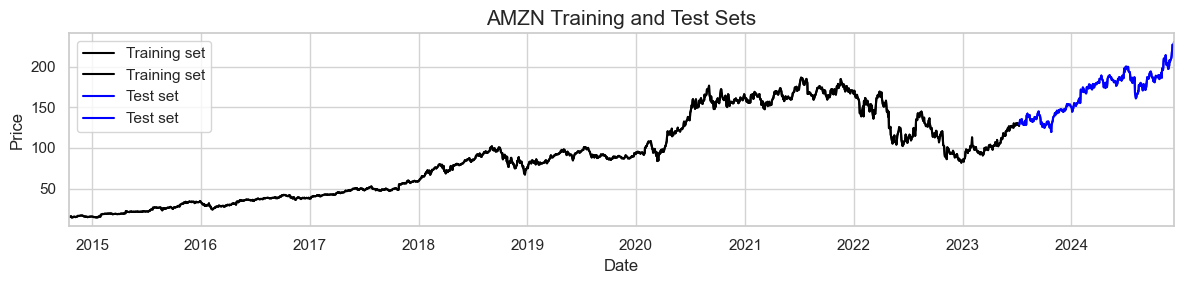

AMZN - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
AMZN - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: AVGO


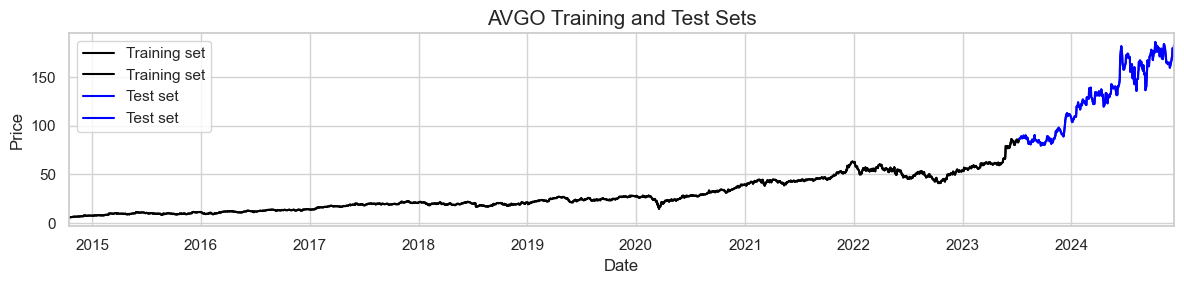

AVGO - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
AVGO - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: COST


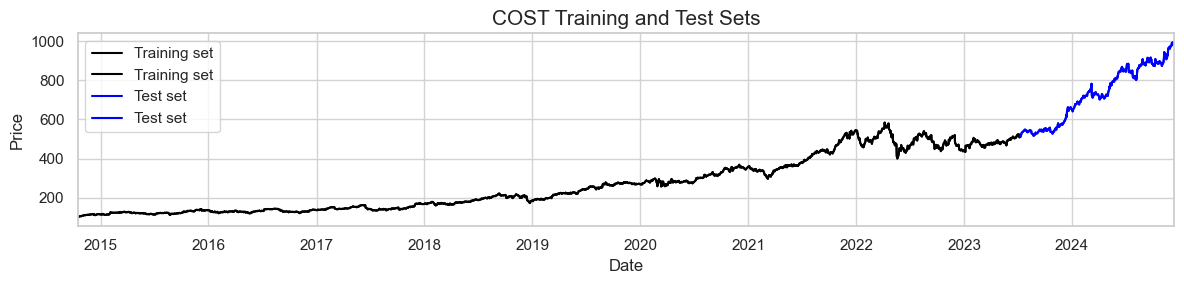

COST - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
COST - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: GOOG


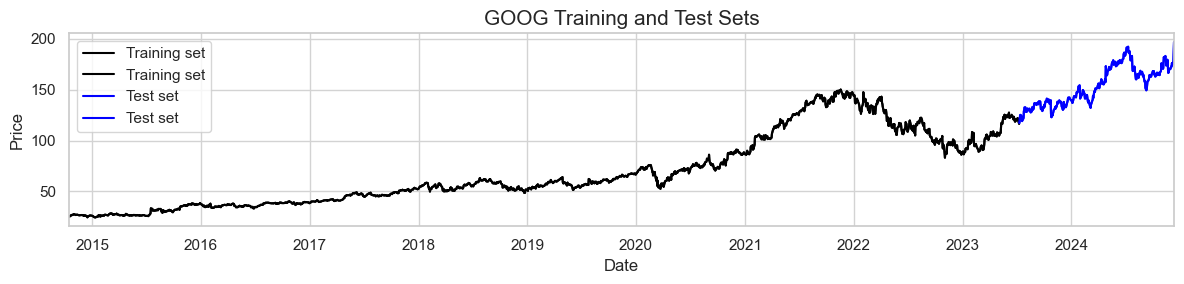

GOOG - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
GOOG - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: GOOGL


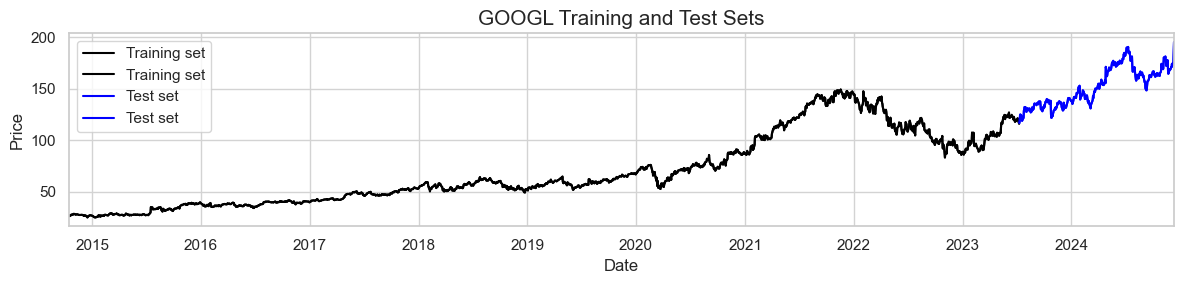

GOOGL - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
GOOGL - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: HD


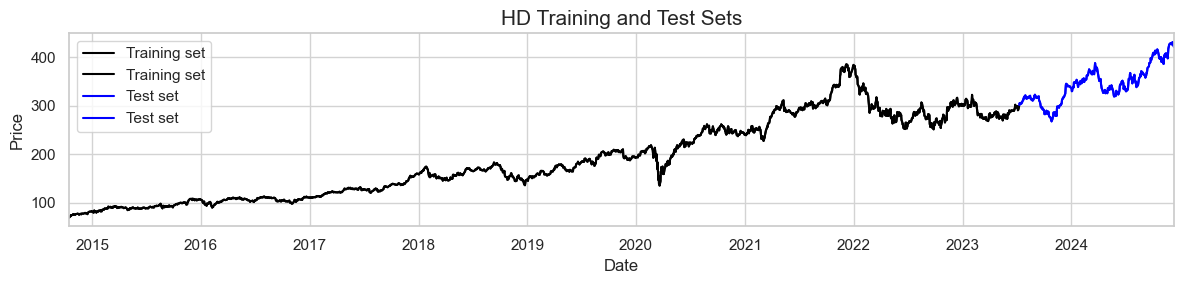

HD - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
HD - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: JPM


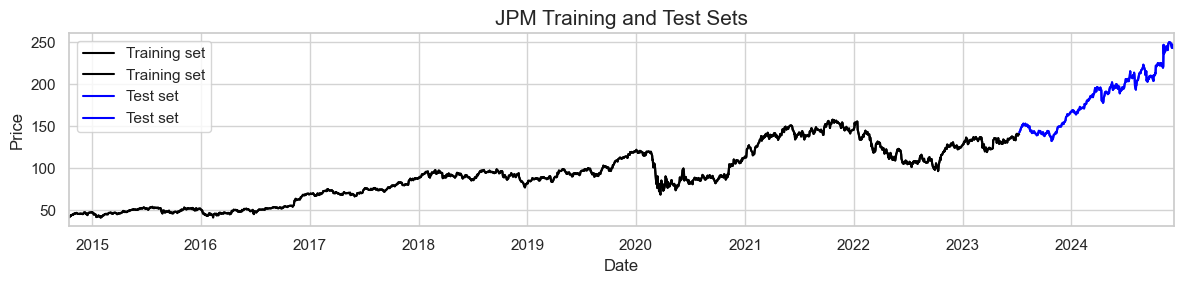

JPM - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
JPM - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: LLY


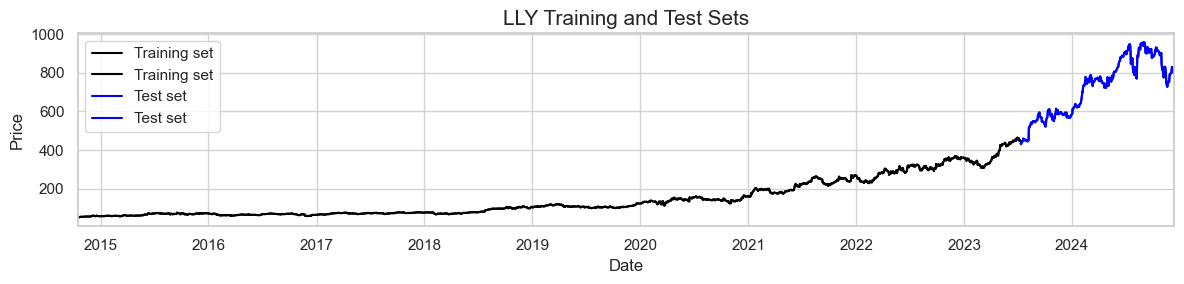

LLY - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
LLY - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: MA


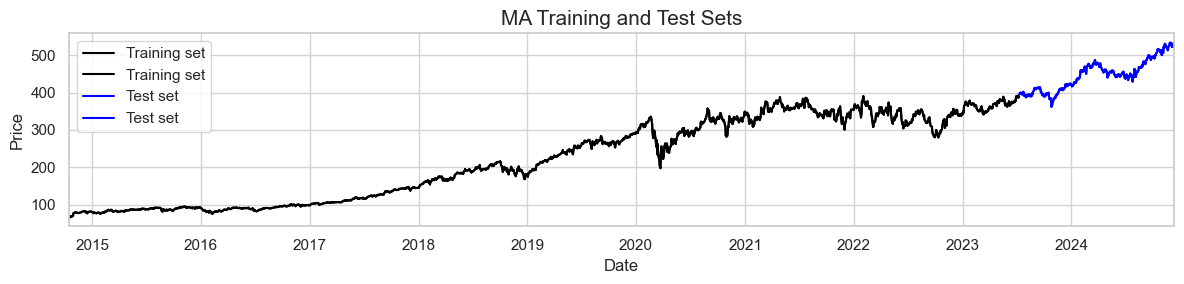

MA - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
MA - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: META


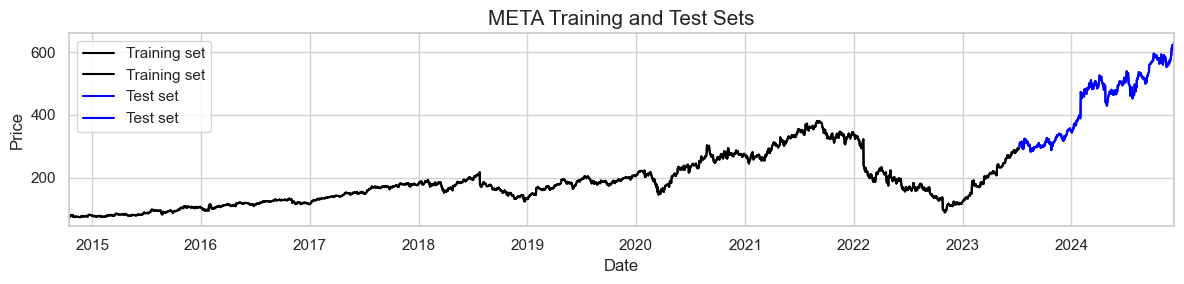

META - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
META - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: MSFT


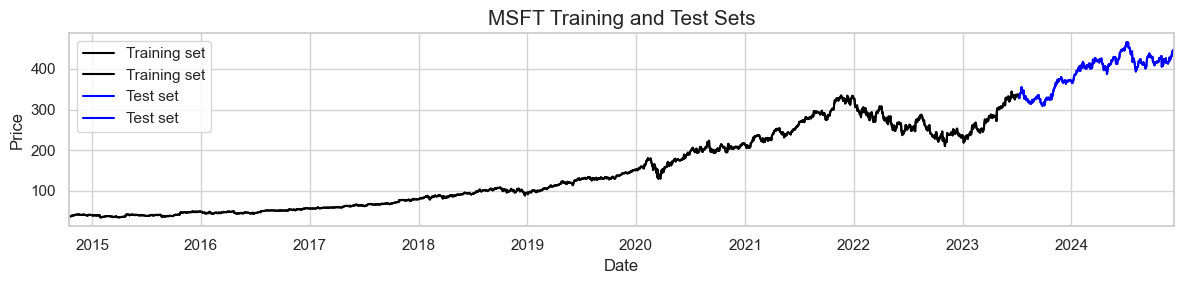

MSFT - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
MSFT - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: NVDA


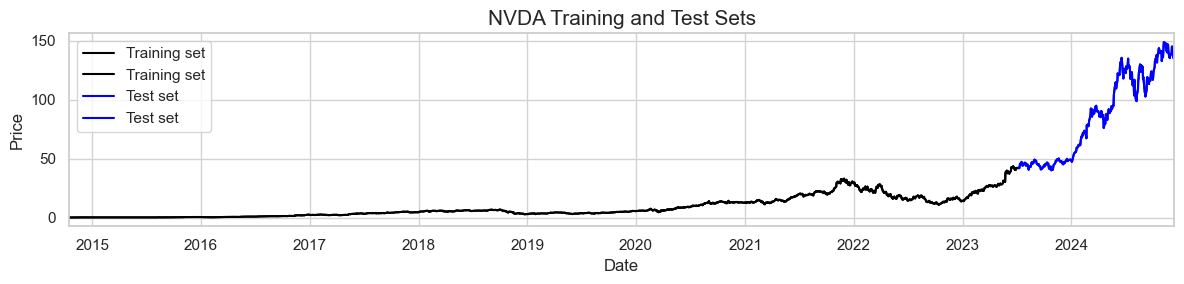

NVDA - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
NVDA - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: ORCL


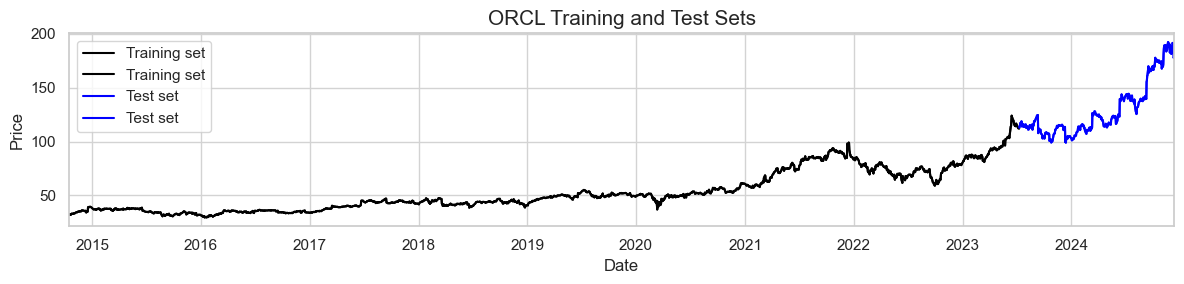

ORCL - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
ORCL - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: PG


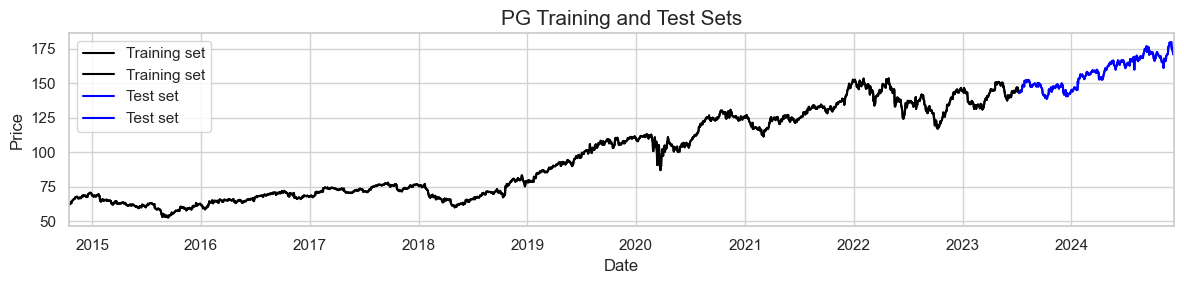

PG - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
PG - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: TSLA


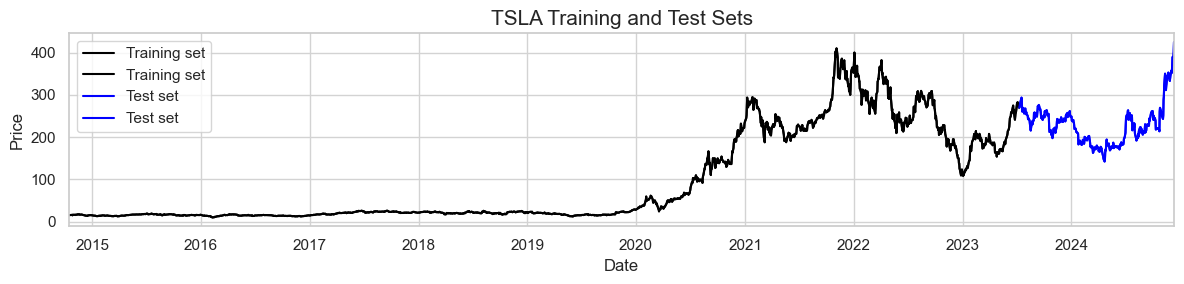

TSLA - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
TSLA - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: UNH


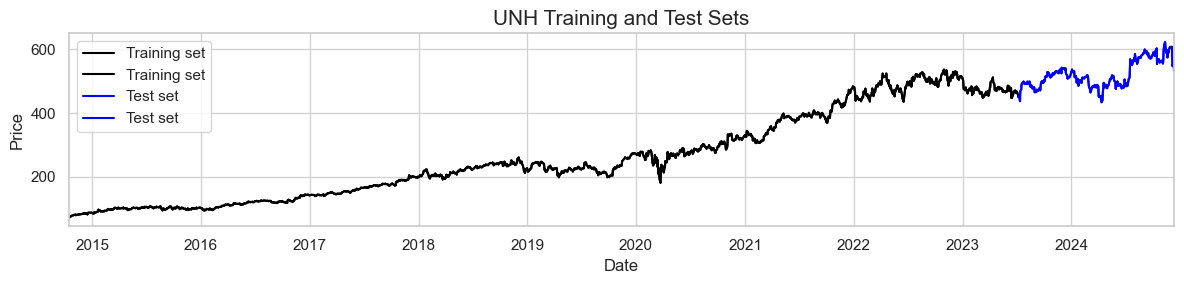

UNH - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
UNH - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: V


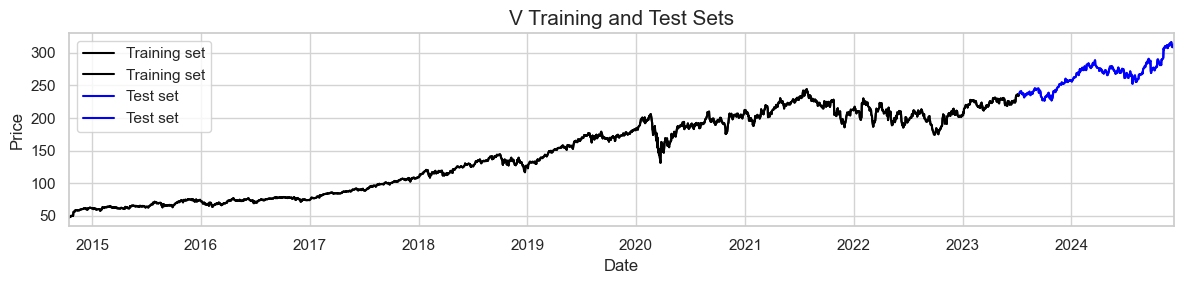

V - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
V - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: WMT


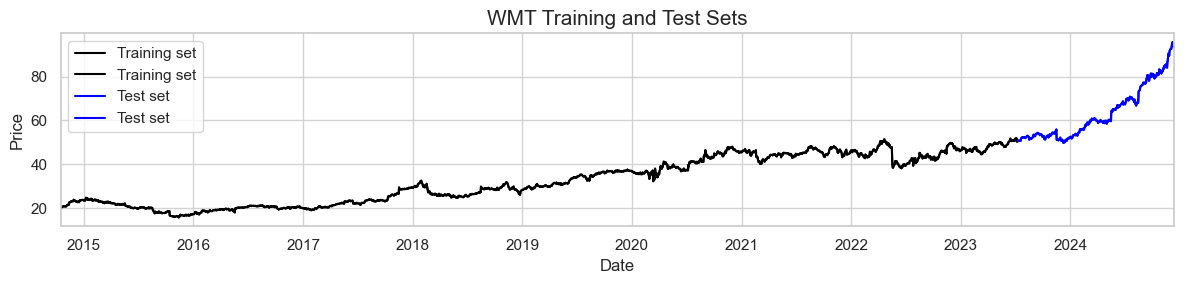

WMT - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
WMT - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
Processing stock: XOM


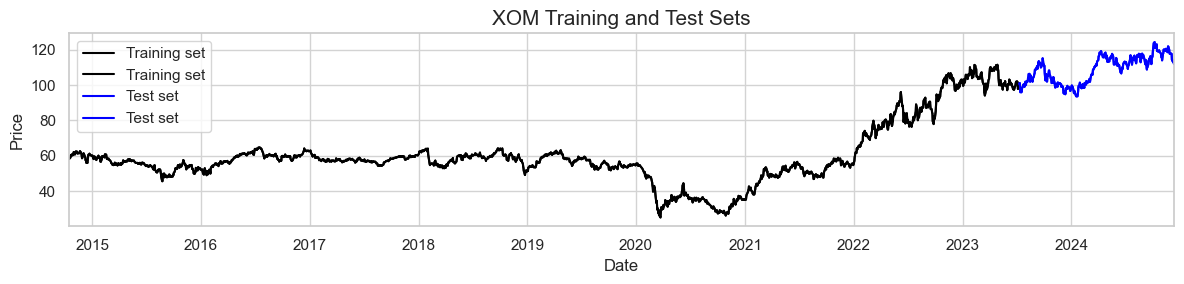

XOM - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
XOM - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)


In [21]:
# data preparation for dataframe sp500
results = data_prep(df=df, stock_columns=stock_column, feature_columns=feature_columns_list,test_size=test_size, window_size=window_size)

**Create function for LSTM model and Training**

*Create the model*

In [24]:
# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

def define_model(window_size, units_lstm_1, units_lstm_2, units_lstm_3, dropout_1, dropout_2, 
                 dropout_3, dense_units, optimizer_name, feature_columns):
    input1 = Input(shape=(window_size, feature_columns))  # Adjust for multiple features
    
    # First LSTM layer
    x = LSTM(units=units_lstm_1, return_sequences=True)(input1)  
    x = Dropout(dropout_1)(x)
    
    # Second LSTM layer
    x = LSTM(units=units_lstm_2, return_sequences=True)(x)
    x = Dropout(dropout_2)(x)
    
    # Third LSTM layer
    x = LSTM(units=units_lstm_3)(x)
    x = Dropout(dropout_3)(x)
    
    # Dense layer with dynamic units
    x = Dense(dense_units, activation='relu')(x)
    
    # Output layer
    dnn_output = Dense(1)(x)

    # Map optimizer name to optimizer object
    optimizer_mapping = {
        'adam': Adam(),
        'nadam': Nadam(),
        'rmsprop': RMSprop()
    }
    optimizer = optimizer_mapping.get(optimizer_name, Adam())
    
    # Compile the model
    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.summary()
    
    return model

**Find the best hyperparameters**

In [26]:
num_features = len(feature_columns_list)
num_features

204

In [27]:
def build_model(hp):
    input1 = Input(shape=(window_size, num_features))

    # Tune the number of units in LSTM layers
    x = LSTM(units=hp.Int('units_layer_1', min_value=32, max_value=128, step=32), return_sequences=True)(input1)
    x = Dropout(hp.Float('dropout_layer_1', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = LSTM(units=hp.Int('units_layer_2', min_value=32, max_value=128, step=32), return_sequences=True)(x)
    x = Dropout(hp.Float('dropout_layer_2', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = LSTM(units=hp.Int('units_layer_3', min_value=32, max_value=128, step=32))(x)
    x = Dropout(hp.Float('dropout_layer_3', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = Dense(hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu')(x)
    dnn_output = Dense(1)(x)  

    # Define the model
    model = Model(inputs=input1, outputs=[dnn_output])

    # Tune the optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'nadam', 'rmsprop'])

    # Compile the model
    model.compile(optimizer=optimizer,
        loss='mean_squared_error',
        metrics=['mean_squared_error'])

    return model



In [28]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=2,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='lstm_tuning',
    overwrite=True)

In [29]:
for stock in stock_column:
    # Access the training and testing data for each stock
    X_train = results[stock]['X_train']
    X_test = results[stock]['X_test']
    y_train = results[stock]['y_train']
    y_test = results[stock]['y_test']


    print(f'{stock} - X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}')
    print(f'{stock} - X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}')


AAPL - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
AAPL - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
AMZN - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
AMZN - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
AVGO - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
AVGO - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
COST - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
COST - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
GOOG - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
GOOG - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
GOOGL - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
GOOGL - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
HD - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
HD - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
JPM - X_train Shape: (2136, 60, 205), y_train Shape: (2136, 1)
JPM - X_test Shape: (360, 60, 205), y_test Shape: (360, 1)
LLY - X_trai

**Loop for all stocks name finding best hyperparameters, fit, and evaluate the model**

In [41]:
def find_fit_eva_multivariate(df, results, tuner, define_model, num_features, feature_columns, test_size ):
    test_size = 360  # Fixed test size for the last 360 rows
    t0 = time.time()
    
    hyperparameters_ = {}
    predictions_ = {}
    models_ = {}
    
    for stock in df.columns:
        print(f"\nProcessing {stock}")
        
        # Get the data and print initial shapes
        data = df[stock].values
        X_train = results[stock]['X_train'][:-test_size]
        y_train = results[stock]['y_train'][:-test_size]
        X_test = results[stock]['X_test'][-test_size:]
        y_test = results[stock]['y_test'][-test_size:]
        
        print(f"Original X_train shape: {X_train.shape}")
        
        # Store original dimensions
        original_samples = X_train.shape[0]
        original_timesteps = X_train.shape[1]
        original_features = X_train.shape[2]
        
        print(f"Original dimensions - Samples: {original_samples}, Timesteps: {original_timesteps}, Features: {original_features}")
        
        # Reshape to 2D using original dimensions
        X_train_2d = X_train.reshape(original_samples * original_timesteps, original_features)
        X_test_2d = X_test.reshape(X_test.shape[0] * X_test.shape[1], original_features)
        
        print(f"2D reshape shape: {X_train_2d.shape}")
        
        # Scale features
        scaler_X = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train_2d)
        X_test_scaled = scaler_X.transform(X_test_2d)
        
        print(f"After scaling shape: {X_train_scaled.shape}")
        
        # Reshape back to 3D using original dimensions
        X_train_scaled = X_train_scaled.reshape(original_samples, original_timesteps, original_features)
        X_test_scaled = X_test_scaled.reshape(X_test.shape[0], original_timesteps, original_features)
        
        print(f"Final 3D shape: {X_train_scaled.shape}")
        
        # Continue with model training
        print(f"Starting tuning for {stock}...")
        tuner.search(X_train_scaled, y_train,
                     epochs=50,
                     batch_size=32,
                     validation_split=0.2,
                     verbose=1)
        
        best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
        print(f"Best Hyperparameters for {stock}:\n {best_hyperparameters.values}")
        
        # Extract parameters
        units_lstm_1 = best_hyperparameters['units_layer_1']
        units_lstm_2 = best_hyperparameters['units_layer_2']
        units_lstm_3 = best_hyperparameters['units_layer_3']
        dropout_1 = best_hyperparameters['dropout_layer_1']
        dropout_2 = best_hyperparameters['dropout_layer_2']
        dropout_3 = best_hyperparameters['dropout_layer_3']
        dense_units = best_hyperparameters['dense_units']
        optimizer_name = best_hyperparameters['optimizer']
        
        # Save hyperparameters
        hyperparameters_dict = best_hyperparameters.values
        hyperparameters_[stock] = pd.DataFrame([hyperparameters_dict])
        
        # Define and train model using original feature dimension
        model = define_model(window_size=original_timesteps,
                             units_lstm_1=units_lstm_1,
                             units_lstm_2=units_lstm_2,
                             units_lstm_3=units_lstm_3,
                             dropout_1=dropout_1,
                             dropout_2=dropout_2,
                             dropout_3=dropout_3,
                             dense_units=dense_units,
                             optimizer_name=optimizer_name,
                             feature_columns=original_features)
        
        model.fit(X_train_scaled, y_train,
                  epochs=50,
                  batch_size=32,
                  validation_split=0.2,
                  verbose=1)
        
        # Evaluate
        test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
        y_pred = model.predict(X_test_scaled)
        print(f'Test loss for {stock}: {test_loss:.4f}')
        
        # Process predictions
        scaler_y = MinMaxScaler()
        scaler_y.fit(y_train.reshape(-1, 1))
        y_test_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))
        y_test_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
        train_data = df[stock][:-test_size].values
        train_data = scaler_y.transform(train_data.reshape(-1, 1))

        predictions_[stock] = y_test_pred
        
        # Calculate metrics
        MSE = mean_squared_error(y_test_true, y_test_pred)
        RMSE = np.sqrt(MSE)
        print(f"Test MSE for {stock}: {MSE:.4f}")
        print(f"Test RMSE for {stock}: {RMSE:.4f}")
        
        # Plot results
        plt.figure(figsize=(12, 3))
        plt.plot(df.index[:-test_size], scaler_y.inverse_transform(train_data), color='black', label='Training Data')
        plt.plot(df.index[-test_size:], y_test_true, color='blue', label='Actual Test Data')
        plt.plot(df.index[-test_size:], y_test_pred, color='red', label='Predicted Test Data')
        plt.title(f'Model Performance on {stock} Prediction', fontsize=15)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.legend(loc='upper left')
        plt.show()
        plt.savefig(f'../images/{stock}_prediction_multi.png', format='png')

        models_[stock] = model
        
    print(f"Total time taken: {time.time() - t0} seconds")
    return hyperparameters_, predictions_, models_



Processing AAPL
Original X_train shape: (1776, 60, 205)
Original dimensions - Samples: 1776, Timesteps: 60, Features: 205
2D reshape shape: (106560, 205)
After scaling shape: (106560, 205)
Final 3D shape: (1776, 60, 205)
Starting tuning for AAPL...
Best Hyperparameters for AAPL:
 {'units_layer_1': 128, 'dropout_layer_1': 0.4, 'units_layer_2': 64, 'dropout_layer_2': 0.4, 'units_layer_3': 64, 'dropout_layer_3': 0.4, 'dense_units': 48, 'optimizer': 'nadam'}


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 205)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 60, 128)        │       171,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 60, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,609 (1002.38 KB)

 Trainable params: 256,609 (1002.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 290ms/step - loss: 0.0105 - val_loss: 0.0246
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - loss: 0.0014 - val_loss: 0.0322
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - loss: 0.0011 - val_loss: 0.0119
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - loss: 0.0010 - val_loss: 0.0138
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - loss: 8.3991e-04 - val_loss: 0.0105
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - loss: 7.1480e-04 - val_loss: 0.0158
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 264ms/step - loss: 6.2152e-04 - val_loss: 0.0097
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 271ms/step - loss: 6.1388e-04 - val_loss: 0.0041
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - loss: 5.1660e-04 - val_loss: 0.0058
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - loss: 4.6313e-04 - val_loss: 0.0067
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - loss: 3.4315e-04 - val_loss: 0.0149
Epoch 12/50
4

ValueError: x and y must have same first dimension, but have shapes (2196,) and (4392, 1)

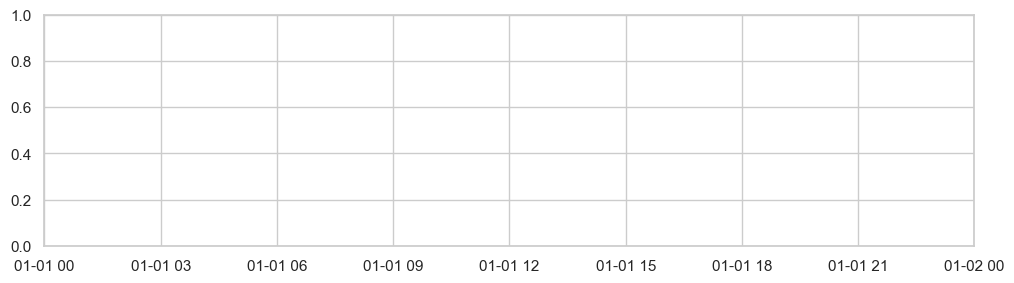

In [43]:
sp500_results = find_fit_eva_multivariate(df=df, test_size=test_size, results=results, tuner=tuner, 
                                         define_model=define_model, num_features=num_features, feature_columns = feature_columns_list)

**Saving Model**

In [ ]:
# sp500_results[0] into a single DataFrame
sp500_results_df = pd.concat(
    [df.assign(stock=stock) for stock, df in sp500_results[0].items()],
    ignore_index=True)

# Export
sp500_results_df.to_csv("../Data/sp500_hyper_multi_df.csv", index=False)

In [ ]:
predictions = sp500_results[1]
predictions_df = pd.DataFrame({stock: pred.ravel() for stock, pred in predictions.items()})

# Export
predictions_df.to_csv("../Data/predictions_set_multi.csv", index=False)

In [ ]:
import keras
import os
models_ = sp500_results[2]
# Creating a directory to save models
os.makedirs('models', exist_ok=True)

# Loop through each stock model
for stock, model in models_.items():
    model_filename = f'models/{stock}_model_multi.keras' 
    model.save(model_filename)
    print(f"Model for {stock} saved to {model_filename}")

**Expected Return**

In [ ]:
forecasted_returns_pct_list = []
for column in predictions_df.columns:
    # Correctly get the first and last value using .iloc
    forecasted_returns = (predictions_df[column].iloc[-1] - predictions_df[column].iloc[0]) / predictions_df[column].iloc[0]
    forecasted_returns_pct = forecasted_returns * 100
    forecasted_returns_pct_list.append(forecasted_returns_pct)

# Create a DataFrame from the list
forecasted_returns_df = pd.DataFrame(forecasted_returns_pct_list, index=predictions_df.columns, columns=["Expected Return (%)"])

# Find the top 10 highest returns
top_10_returns = forecasted_returns_df.sort_values(by="Expected Return (%)", ascending=False).head(10)
top_10_returns.to_csv("../Data/top_10_returns_sp500_multi.csv")